In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = np.array([[-1,3],[2,-2]])
vector = np.array([[2],[1]])

In [56]:
def graficarVectores(vecs, cols, alpha = 1):
  plt.axvline(x = 0, color = 'grey', zorder=0)
  plt.axhline(y = 0, color = 'grey', zorder=0)

  for i in range(len(vecs)):
    x = np.concatenate([[0,0], vecs[i]])
    plt.quiver( [x[0]],
                [x[1]],
                [x[2]],
                [x[3]],
                angles = 'xy', scale_units = 'xy',
                scale = 1,
                color = cols[i],
                alpha = alpha
               )

In [ ]:
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

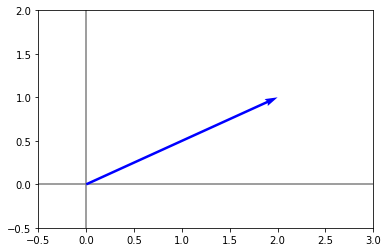

In [ ]:
graficarVectores([vector.flatten()], cols='blue')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)

In [ ]:
vector_transformado = A.dot(vector)
vector_transformado

array([[1],
       [2]])

(-0.5, 2.5)

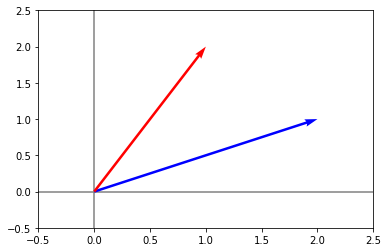

In [ ]:
graficarVectores([vector.flatten(), vector_transformado.flatten()], cols=['blue', 'red'])
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

# Autovectores y autovalores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.array([[3, 2], [4, 1]])
v = np.array([[1], [1]])
u = X.dot(v)
print(u)

[[5]
 [5]]


(-1.0, 6.0)

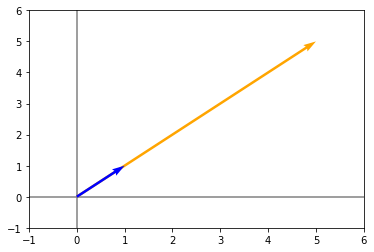

In [ ]:
graficarVectores([u.flatten(), v.flatten()],cols=['orange', 'blue'])
plt.xlim(-1, 6)
plt.ylim(-1, 6)

In [ ]:
s = np.array([[-1], [2]])
t = X.dot(s)
t

array([[ 1],
       [-2]])

(-3.0, 3.0)

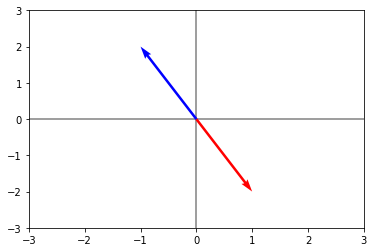

In [ ]:
graficarVectores([t.flatten(), s.flatten()],cols=['red', 'blue'])
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Como calcular los autovalores y autovectores

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array([[3,2], [4,1]])
print(X)
print(np.linalg.eig(X))

[[3 2]
 [4 1]]
(array([ 5., -1.]), array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))


(-3.0, 3.0)

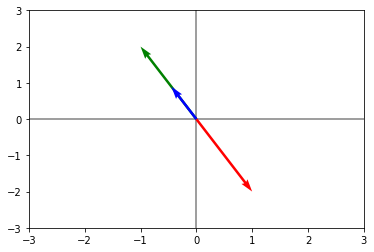

In [ ]:
autovalores, autovectores = np.linalg.eig(X)
v = np.array([[-1], [2]])

graficarVectores([v.flatten(), X.dot(v).flatten(), autovectores[:,1]], cols=['green', 'red', 'blue'])
plt.ylim(-3, 3)
plt.xlim(-3, 3)

# Descomposicion de matrices

Quiere decir encontrar dos o más matrices que me ayuden a escribir la matriz original y que tengan ciertas propiedades.
Una matriz A la podemos escribir como: sus autovectores producto punto una matriz diagonal, donde la matriz diagonal tiene todos los autovalores encontrados, producto punto la matriz inversa de sus autovectores.

In [ ]:
import numpy as np

In [ ]:
A = np.array([[3,2], [4,1]])
autovalores, autovectores = np.linalg.eig(A)
print(autovalores)
print(autovectores)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [ ]:
A_calc = autovectores.dot(np.diag(autovalores)).dot(np.linalg.inv(autovectores))
print(A_calc)

[[3. 2.]
 [4. 1.]]


Tambien hay otras descomposiciones. Una de ellas es que nuestra Matriz A sea real y simétrica (A = A-transpuesta). Decimos que A = la matriz de autovectores producto punto la matriz diagonal con los autovalores, producto punto la transpuesta de la matriz de autovectores. NOTA: Calcular la transpuesta de una matriz es mucho más económico en cómputo que calcular la inversa de una matriz. Y hay que recordar que el cómputo cuesta dinero.

In [ ]:
A = np.array([[3, 2], [2, 3]])
print(A)
print(A == A.T) # Matriz simetrica

[[3 2]
 [2 3]]
[[ True  True]
 [ True  True]]


In [ ]:
autovalores, autovectores = np.linalg.eig(A)
print(autovalores)
print(autovectores)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [ ]:
A_calc = autovectores.dot(np.diag(autovalores)).dot(autovectores.T)
print(A_calc)

[[3. 2.]
 [2. 3.]]


# Descomposicion de una matriz no cuadrada (SVD)


In [ ]:
import numpy as np

In [ ]:
A = np.array([[1,2,3],[3,4,5]])
print(A)

[[1 2 3]
 [3 4 5]]


In [ ]:
U, D, V = np.linalg.svd(A)
print(U)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]


In [ ]:
print(np.diag(D))

[[7.97638869 0.        ]
 [0.         0.61418515]]


In [ ]:
print(V)

[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


In [ ]:
# A = U*D*V
magicMatrix = np.array([[D[0],0,0],[0,D[1],0]])
A_calc = U.dot(magicMatrix).dot(V)
print(A_calc)

[[1. 2. 3.]
 [3. 4. 5.]]


# Las tres transformaciones

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def graficarMatriz(matriz, vectorCol=['red', 'blue']):

  # Circulo unitario
  x = np.linspace(-1, 1, 100000)
  y = np.sqrt(1-(x**2))

  # Circulo unitario transformado
  x1 = matriz[0,0]*x + matriz[0,1]*y
  y1 = matriz[1,0]*x + matriz[1,1]*y

  x1_neg = matriz[0,0]*x - matriz[0,1]*y
  y1_neg = matriz[1,0]*x - matriz[1,1]*y

  # Vectores
  u1 = [matriz[0,0], matriz[1,0]]
  v1 = [matriz[0,1], matriz[1,1]]

  graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])
  plt.plot(x1,y1, 'green', alpha = 0.7)
  plt.plot(x1_neg,y1_neg, 'green', alpha = 0.7)

[[1. 0.]
 [0. 1.]]
Circulo unitario


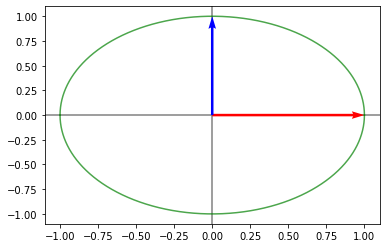

In [ ]:
A = np.array([[3,7], [5,2]])
print(np.eye(2))
print("Circulo unitario")
graficarMatriz(np.eye(2))

Circulo unitario transformado


(-8.0, 8.0)

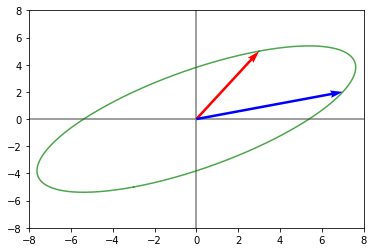

In [ ]:
# Tranformando el circulo unitario
print("Circulo unitario transformado")
graficarMatriz(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)

# Aplicacion de las matrices D, V y U
* La matriz V rota el espacio
* La matriz D escala el espacio.
* La matriz U rota de nuevo el espacio.
* La transformación del espacio de una matriz A es igual a la transformación de las matrices SVD (Valores singulares)

La descomposición por valores singulares tiene efectos similares:

* autovectores → rota el espacio
* diag(autovalores) → escala el espacio
* inv(autovectores) → rota el espacio

In [ ]:
U, D, V = np.linalg.svd(A)
print(U)

[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]


Primer Rotacion V: 


(-1.0, 1.5)

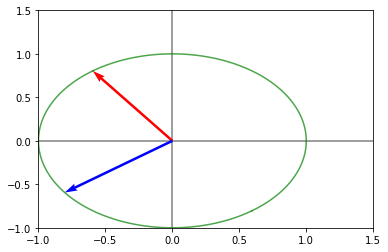

In [ ]:
print("Primer Rotacion V: ")
graficarMatriz(V)
plt.xlim(-1, 1.5)
plt.ylim(-1, 1.5)

Escala D: 


(-9.0, 9.0)

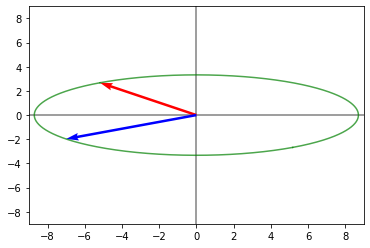

In [ ]:

print("Escala D: ")
graficarMatriz(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)

Segunda Rotacion U: 


(-9.0, 9.0)

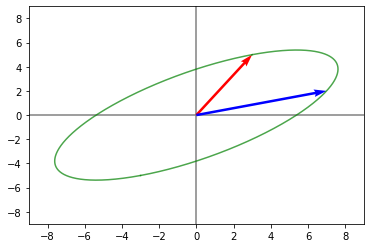

In [ ]:
print("Segunda Rotacion U: ")
graficarMatriz(U.dot(np.diag(D).dot(V)))
plt.xlim(-9, 9)
plt.ylim(-9, 9)

# Imagen es una matriz

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request as request

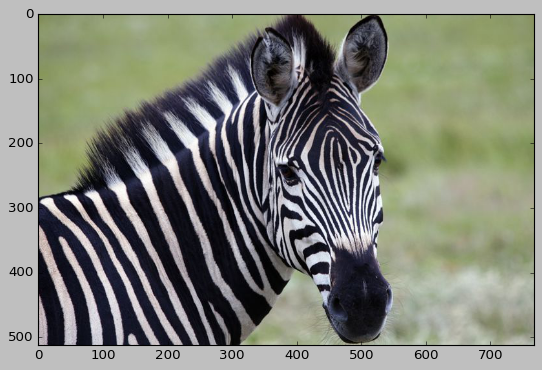

In [9]:
plt.style.use('classic')
img = request.urlretrieve("https://fthmb.tqn.com/3zQcrITa-D1ZzR_rP0xJpEkwSBY=/768x0/filters:no_upscale()/188063011-56a27c4d3df78cf7727695e7.jpg", 'zebra.jpg')
imagen = Image.open(img[0])
plt.imshow(imagen)

In [10]:
imagen_gr = imagen.convert('LA')
print(imagen_gr)

<PIL.Image.Image image mode=LA size=768x512 at 0x7FD10DD15BE0>


In [12]:
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
print(imagen_mat)

[131. 131. 132. ... 183. 182. 180.]


# Aplicar la descomposicion SVD a una imagen

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

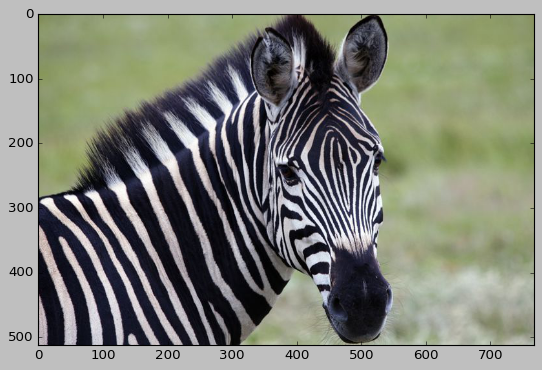

In [14]:
plt.style.use('classic')
plt.imshow(imagen)

In [15]:
imagen_gr = imagen.convert('LA')
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])

In [16]:
U, D, V = np.linalg.svd(imagen_mat)

In [17]:
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(512, 768)
(512, 512)
(512,)
(768, 768)


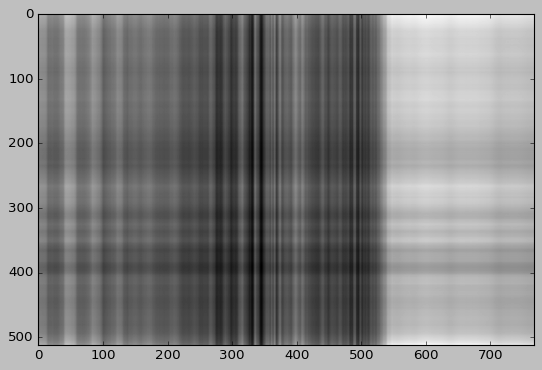

In [21]:
imagen_recons = np.matrix(U[:,:1])* np.diag(D[:1]) *np.matrix(V[:1,:])
plt.imshow(imagen_recons, cmap='gray')

In [65]:
i = 250
imagen_recons = np.matrix(U[:,:i])* np.diag(D[:i]) *np.matrix(V[:i,:])
title = "valores singulares = %s" %i
plt.title(title)
plt.imshow(imagen_recons, cmap='gray')

ValueError: ignored

# Pseudo inversa de Moore Penrose y como calcularla

Sistema de ecuaciones lineales Ax = b

*A_pse = V.T * D_pse * U.T*

La matriz A_pse o pseudo inversa debe de cumplir con la propiedad A*A_pse aproximadamente = Identidad

In [35]:
import numpy as np
np.set_printoptions(suppress=True)

In [36]:
A = np.array([[2,3],[5,7],[11,13]])
print(A)

[[ 2  3]
 [ 5  7]
 [11 13]]


In [38]:
U, D, V = np.linalg.svd(A)

D_pse = np.zeros((A.shape[0], A.shape[1])).T
print(D_pse)

[[0. 0. 0.]
 [0. 0. 0.]]


In [39]:
D_pse[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_pse)

[[0.05153785 0.         0.        ]
 [0.         1.39306957 0.        ]]


In [43]:
A_pse = V.T.dot(D_pse).dot(U.T)
print(A_pse)

# Otra manera de calcularla
A_pse2 = np.linalg.inv(A.T.dot(A)).dot(A.T)
print(A_pse2)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]
[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [41]:
# Comprobando que se de la propiedad de una matriz aproximada a la identidad
print(A_pse.dot(A))
# Aparece un -0 debido a que se setio al principio el print options

[[ 1. -0.]
 [ 0.  1.]]


# Usando la pseudo inversa para resolver un sistema de sobredeterminado
El método de pseudo inversa para encontrar una solución que se acerque para un sistema sobredeterminado da un punto que según el peso de la ecuación.

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(-6.0, 6.0)

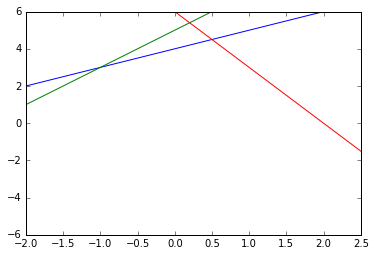

In [70]:
x = np.linspace(-5,5,1000)
y_1 = 1*x + 4
y_2 = 2*x + 5
y_3 = -3*x + 6

plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)
plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

In [71]:
matriz = np.array([[-1,1],[-2,1],[3,1]])
matriz_pse = np.linalg.pinv(matriz)
print(matriz_pse)
b = np.array([[4],[5],[6]])

[[-0.07142857 -0.14285714  0.21428571]
 [ 0.33333333  0.33333333  0.33333333]]


[[0.28571429]
 [5.        ]]


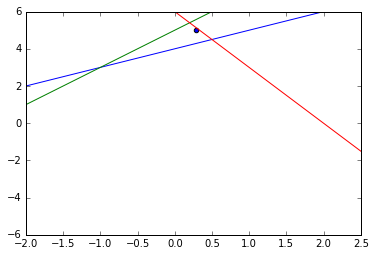

In [72]:
resultado = matriz_pse.dot(b)
print(resultado)

plt.plot(x,y_1)
plt.plot(x,y_2)
plt.plot(x,y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.scatter(resultado[0], resultado[1])


# ¿Que es PCA?
* **La maldición de la dimensión:** Esto dice que por cada variable que agrego en el conjunto de datos vamos a necesitar exponencialmente más muestras para poder tener la misma relevancia estadística.

* **¿Cuál es el autovector relacionado con el autovalor más grande?** Es el autovalor quien define cual es la dirección que contiene más información.

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

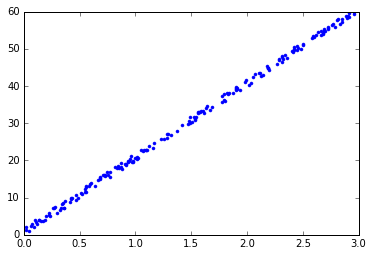

In [51]:
np.random.seed(42)
x = 3*np.random.rand(200)
y = 20*x + 2*np.random.rand(200)

x = x.reshape(200,1)
y = y.reshape(200,1)
xy = np.hstack([x, y])
plt.plot(xy[:,0],xy[:,1],'.')

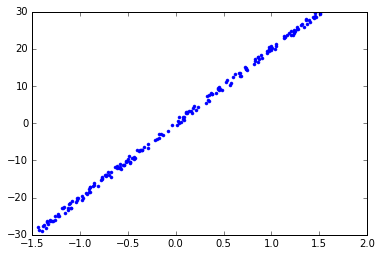

In [53]:
xy_centrado = xy - np.mean(xy, axis=0)
plt.plot(xy_centrado[:,0],xy_centrado[:,1],'.')

In [55]:
autovalores, autovectores = np.linalg.eig(xy_centrado.T.dot(xy_centrado))
print(autovectores)

[[-0.99875285 -0.04992746]
 [ 0.04992746 -0.99875285]]


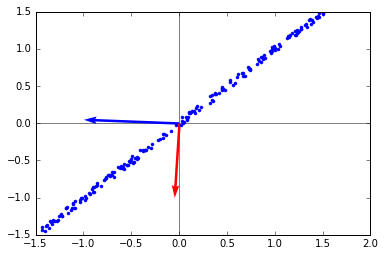

In [59]:
graficarVectores(autovectores.T, ['blue','red'])
plt.plot(xy_centrado[:,0], xy_centrado[:,1]/20, '.')

In [60]:
print(autovalores)

[    0.17040841 62411.78877548]


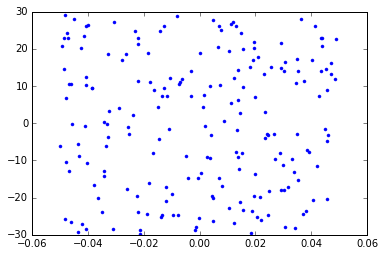

In [63]:
xy_nuevo = autovectores.T.dot(xy_centrado.T)
plt.plot(xy_nuevo[0,:], xy_nuevo[1,:],'.')

# Analisis de componentes principales (PCA). Ejemplo aplicado a imagenes

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio 
import pandas as pd

In [68]:
matriz = np.array([[1, 2], [3, 4], [5, 6]])
print(np.linalg.pinv(matriz))

[[-1.33333333 -0.33333333  0.66666667]
 [ 1.08333333  0.33333333 -0.41666667]]
